In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Génération des signaux
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time+2)  # Signal 1 : sinusoidal signal
s2 = np.sin(np.sin(3 * time+1))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Ajout de bruit

S /= S.std(axis=0)  # Standardiser les données
# Mélanger les données
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Matrice de mélange
X = np.dot(S, A.T)  # Générer les observations

# Visualisation des signaux originaux et mélangés
fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True)
fig.suptitle('Visualisation des Signaux')

# Signaux originaux
axes[0, 0].plot(time, s1)
axes[0, 0].set_title('Signal Sinusoidal')

axes[1, 0].plot(time, s2)
axes[1, 0].set_title('Signal Carré')

axes[2, 0].plot(time, s3)
axes[2, 0].set_title('Signal Dent de Scie')

# Signaux mélangés
axes[0, 1].plot(time, X[:, 0])
axes[0, 1].set_title('Signal Mélangé 1')

axes[1, 1].plot(time, X[:, 1])
axes[1, 1].set_title('Signal Mélangé 2')

axes[2, 1].plot(time, X[:, 2])
axes[2, 1].set_title('Signal Mélangé 3')

# Ajouter des labels
for ax in axes.flat:
    ax.set_xlabel('Temps')
    ax.set_ylabel('Amplitude')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [9]:
from sklearn.decomposition import PCA, FastICA

# Compute ICA
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

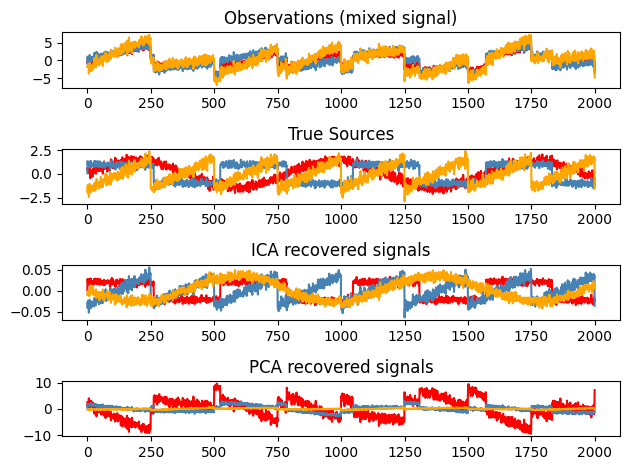

In [4]:
import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()